In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2019-12-17']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AAPL' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466093,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533088,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672224,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804706,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784393,394024400
...,...,...,...,...,...,...,...
1997,2019-12-10,67.150002,67.517502,66.464996,67.120003,65.476593,90420400
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.035080,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.203362,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.103264,133587600


In [3]:
data = df.filter(['Close'])
dataset = data.values
training_data_length = math.ceil(len(dataset) * .8)
training_data_length


1602

In [4]:
#scale the data
scale = MinMaxScaler(feature_range=(0,1))
scale_data = scale.fit_transform(dataset)
scale_data

array([[0.01319741],
       [0.0146064 ],
       [0.01753279],
       ...,
       [0.96251175],
       [0.97897982],
       [1.        ]])

In [5]:
#created scaled data set
train_data = scale_data[0:training_data_length, :]
#x y split
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)


[array([0.01319741, 0.0146064 , 0.01753279, 0.0203189 , 0.01989175,
       0.02085445, 0.02041453, 0.01967498, 0.01866763, 0.02178528,
       0.0245969 , 0.02372984, 0.01898003, 0.02351306, 0.01905017,
       0.03578602, 0.03449178, 0.0361813 , 0.03983448, 0.04204679,
       0.04186192, 0.04117974, 0.04408699, 0.04682209, 0.04992064,
       0.05492545, 0.06543873, 0.06559813, 0.07145091, 0.07582452,
       0.06830777, 0.07120224, 0.07114488, 0.07926097, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.09236911, 0.0968511 ,
       0.09814534, 0.09859803, 0.09093463, 0.08908568, 0.08935985,
       0.09656424, 0.09859166, 0.10294618, 0.11321081, 0.12690551,
       0.12434253, 0.1243489 , 0.13425015, 0.1373487 , 0.13514272,
       0.13312807, 0.13103049, 0.13799896, 0.14278066, 0.14478259])]
[0.13983513293775218]


In [6]:
#put data into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [8]:
#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
#test the dataset

print(training_data_length)
#create test set
test_data = scale_data[training_data_length - 60: , : ]
x_test = []
y_test = dataset[training_data_length:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

print(x_test)

1602
[array([0.51796321, 0.51448215, 0.52086405, 0.53425273, 0.54973896,
       0.54715048, 0.54594548, 0.53202128, 0.53742142, 0.54014378,
       0.53947431, 0.53215517, 0.54067931, 0.55424646, 0.56201191,
       0.55420185, 0.54737365, 0.5483108 , 0.54549923, 0.53336017,
       0.53309239, 0.51537471, 0.50457454, 0.48712461, 0.52206905,
       0.50229841, 0.49399743, 0.49979921, 0.49488999, 0.50252157,
       0.51689208, 0.52220294, 0.50247696, 0.50992999, 0.52421122,
       0.5205963 , 0.52818319, 0.53081628, 0.53568089, 0.54648107,
       0.54469588, 0.52220294, 0.49060565, 0.48846348, 0.47819883,
       0.48136743, 0.48391131, 0.47543185, 0.4885527 , 0.50569026,
       0.53902806, 0.54045615, 0.57142861, 0.57736428, 0.58133625,
       0.58718262, 0.59914313, 0.59267196, 0.59070827, 0.58307678]), array([0.51448215, 0.52086405, 0.53425273, 0.54973896, 0.54715048,
       0.54594548, 0.53202128, 0.53742142, 0.54014378, 0.53947431,
       0.53215517, 0.54067931, 0.55424646, 0.56201191,

In [10]:
#fit/train the model
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model.fit(x_train, y_train, batch_size=1, epochs = 1)

1542/1542 [==============================] - 47s 28ms/step - loss: 0.0014


In [14]:
#Get the predictions

predictions = model.predict(x_test)
predictions = scale.inverse_transform(predictions)

13/13 [==============================] - 0s 13ms/step


In [15]:
#Get root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.8023036208422851

<ipython-input-16-cea8046cba25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


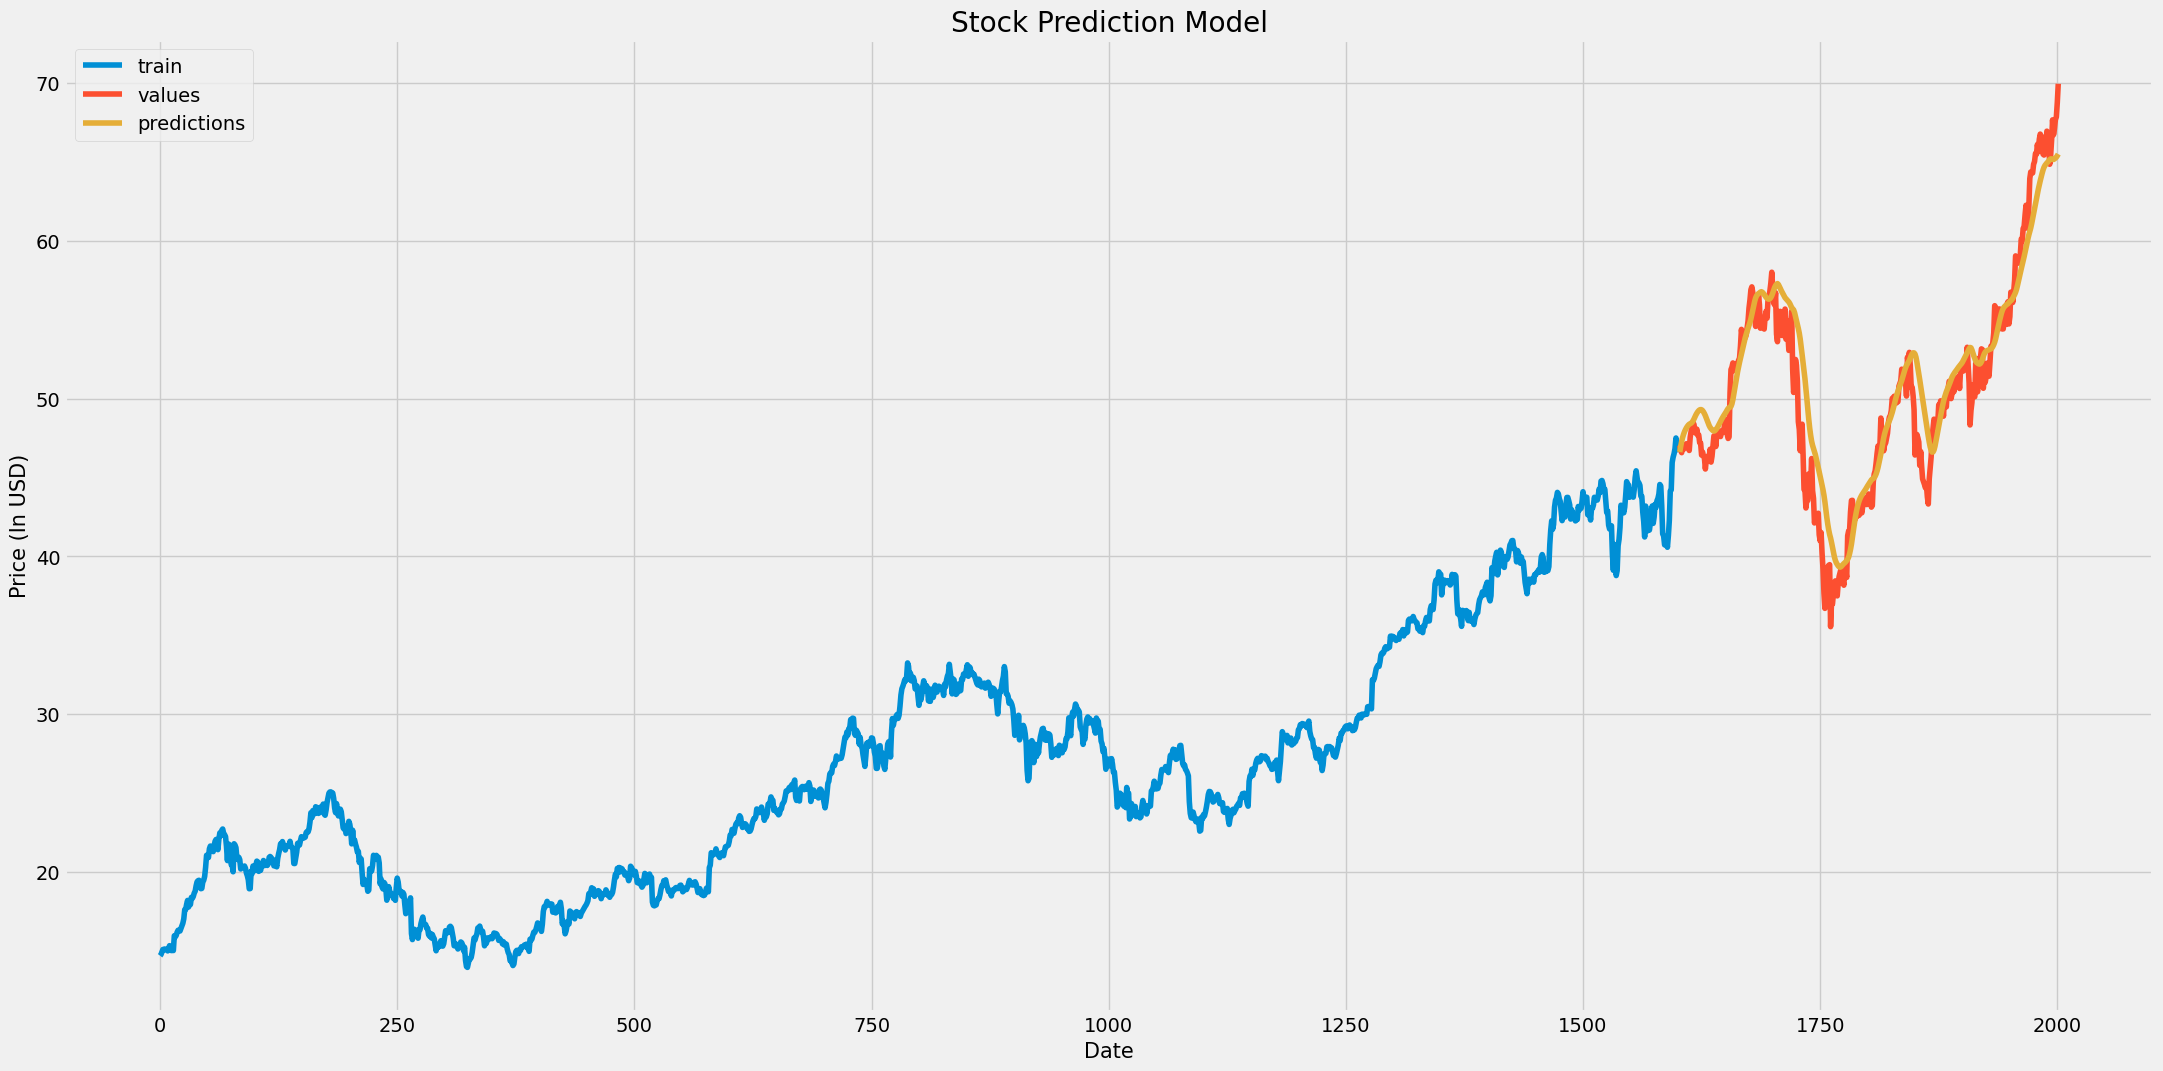

In [16]:
#plot the data
train = data[:training_data_length]
valid = data[training_data_length:]
valid['predictions'] = predictions
plt.figure(figsize=(24,12))
plt.title('Stock Prediction Model')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price (In USD)', fontsize = 15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', 'values', 'predictions'])